Importing the libraries

In [ ]:
import numpy as np #numerical python
import pandas as pd #data manipulation
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns # data visusalisation
import re #data cleaning
from sklearn.linear_model  import LinearRegression #ml algorithm
from sklearn.metrics import r2_score #accuracy metric
from sklearn.model_selection import train_test_split #splitting the dataset into traning and testing dataset
from sklearn.preprocessing import LabelEncoder #converting the categories data into numerical data
import pickle #python libraries

# problem statement
.you have the been given a dataset that describe the functionality of house. Now,based on the given features, you have to build a model to predict the hgose price.

#Defining the dataset
Link: https://drive.google.com/file/d/1yrVwfX1LjISQ6vdR1Kaht-S1_8y2Gk6z/view?usp=sharing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Housing.csv')

In [ ]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [ ]:
df.tail()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished

In [ ]:
df.shape[0]

545

In [ ]:
df.shape[1]

13

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [ ]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.isna().sum().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


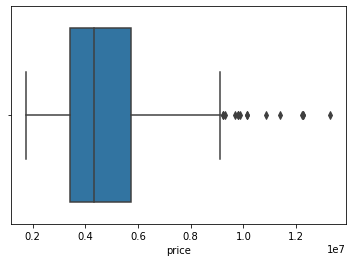

In [ ]:
sns.boxplot(df.price)#checking for the outliers

In [ ]:
df.head(2)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished

In [ ]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.mainroad.replace(['yes','no'],[0,1])

0      0
1      0
2      0
3      0
4      0
      ..
540    0
541    1
542    0
543    1
544    0
Name: mainroad, Length: 545, dtype: int64

In [ ]:
newdf =df.copy()

In [ ]:
enc=LabelEncoder()

In [ ]:
newdf.mainroad

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542    yes
543     no
544    yes
Name: mainroad, Length: 545, dtype: object

In [ ]:
newdf.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [ ]:
newdf.mainroad = enc.fit_transform(newdf.mainroad)

In [ ]:
newdf.mainroad

0      1
1      1
2      1
3      1
4      1
      ..
540    1
541    0
542    1
543    0
544    1
Name: mainroad, Length: 545, dtype: int64

In [ ]:
df.head(2)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished

In [ ]:
df.mainroad = enc.fit_transform(df.mainroad)
df.guestroom = enc.fit_transform(df.guestroom)
df.basement	 = enc.fit_transform(df.basement)
df.hotwaterheating = enc.fit_transform(df.hotwaterheating)
df.airconditioning = enc.fit_transform(df.airconditioning)
df.prefarea = enc.fit_transform(df.prefarea)

In [ ]:
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [ ]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
df.furnishingstatus =enc.fit_transform(df.furnishingstatus)

In [ ]:
df.furnishingstatus.value_counts()

1    227
2    178
0    140
Name: furnishingstatus, dtype: int64

In [ ]:
'''0->furnished
   1->semi furnished
   2->unfurished
'''

'0->furnished\n   1->semi furnished\n   2->unfurished\n'

# obsevation
   1.Data strength:545

   2.No of random variables:13

   3.None of the columns contained null values

   4.columns-price,area,bedrooms,bathrooms,stories,parking were having numerical value

   5.columns-mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus were having categorical value
   


In [ ]:
df.head(1)

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   

   furnishingstatus  
0                 0

In [ ]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [ ]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000000    0.000000         0.000000         0.000000   
25%      1.000000    0.000000    0.000000         0.000000         0.000000   
50%      1.000000    0.000000    0.000000         0.000000         0.000000   
75%      1.000000    0.000000    1.000000         0.000000         1.000000   
max      1.000000    1.000000    1.000000         1.000000         1.000000   

          parking    prefarea  furnishingstatus  
count  545.000000  545.000000        545.000000  
mean     0.693578    0.234862          1.069725  
std      0.861586    0.424302          0.761373  
min      0.000000    0.000000          0.000000  
25%      0.000000    0.000000          0.000000  
50%      0.000000    0.000000          1.000000  
75%      1.000000    0.000000          2.000000  
max      3.000000    1.000000          2.000000

In [ ]:
df.corr()

price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  0.234779  0.079023   0.063472  0.044425  0.199876   
furnishingstatus -0.304721 -0.171445 -0.123244  -0.143559 -0.104672 -0.156726   

                  guestroom  basement  hotwaterheating  airconditioning  \
price              0.255517  0.187057         0.093073         0.452954   
area               0.140297  0.047417        -0.009229         0.222393   
bedrooms           0.080549  0.097312         0.046049         0.160603   
bathrooms          0.126469  0.102106         0.067159         0.186915   
stories            0.043538 -0.172394         0.018847         0.293602   
mainroad           0.092337  0.044002        -0.011781         0.105423   
guestroom          1.000000  0.372066        -0.010308         0.138179   
basement           0.372066  1.000000         0.004385         0.047341   
hotwaterheating   -0.010308  0.004385         1.000000        -0.130023   
airconditioning    0.138179  0.047341        -0.130023         1.000000   
parking            0.037466  0.051497         0.067864         0.159173   
prefarea           0.160897  0.228083        -0.059411         0.117382   
furnishingstatus  -0.118328 -0.112831        -0.031628        -0.150477   

                   parking  prefarea  furnishingstatus  
price             0.384394  0.329777         -0.304721  
area              0.352980  0.234779         -0.171445  
bedrooms          0.139270  0.079023         -0.123244  
bathrooms         0.177496  0.063472         -0.143559  
stories           0.045547  0.044425         -0.104672  
mainroad          0.204433  0.199876         -0.156726  
guestroom         0.037466  0.160897         -0.118328  
basement          0.051497  0.228083         -0.112831  
hotwaterheating   0.067864 -0.059411         -0.031628  
airconditioning   0.159173  0.117382         -0.150477  
parking           1.000000  0.091627         -0.177539  
prefarea          0.091627  1.000000         -0.107686  
furnishingstatus -0.177539 -0.107686          1.000000

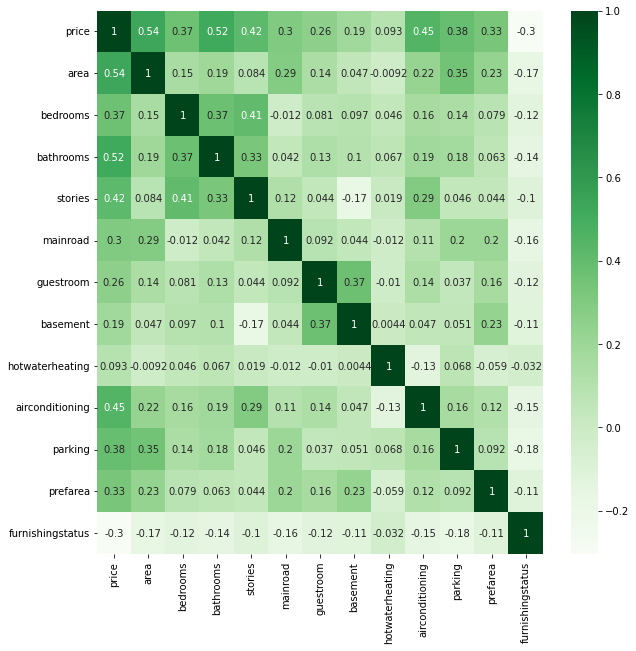

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='Greens')

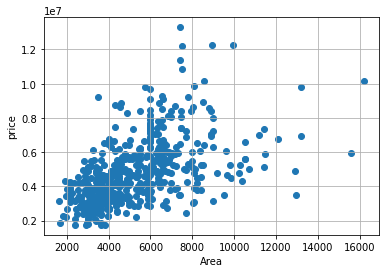

In [ ]:
plt.scatter(df.area,df.price)
plt.xlabel('Area')
plt.ylabel('price')
plt.grid()

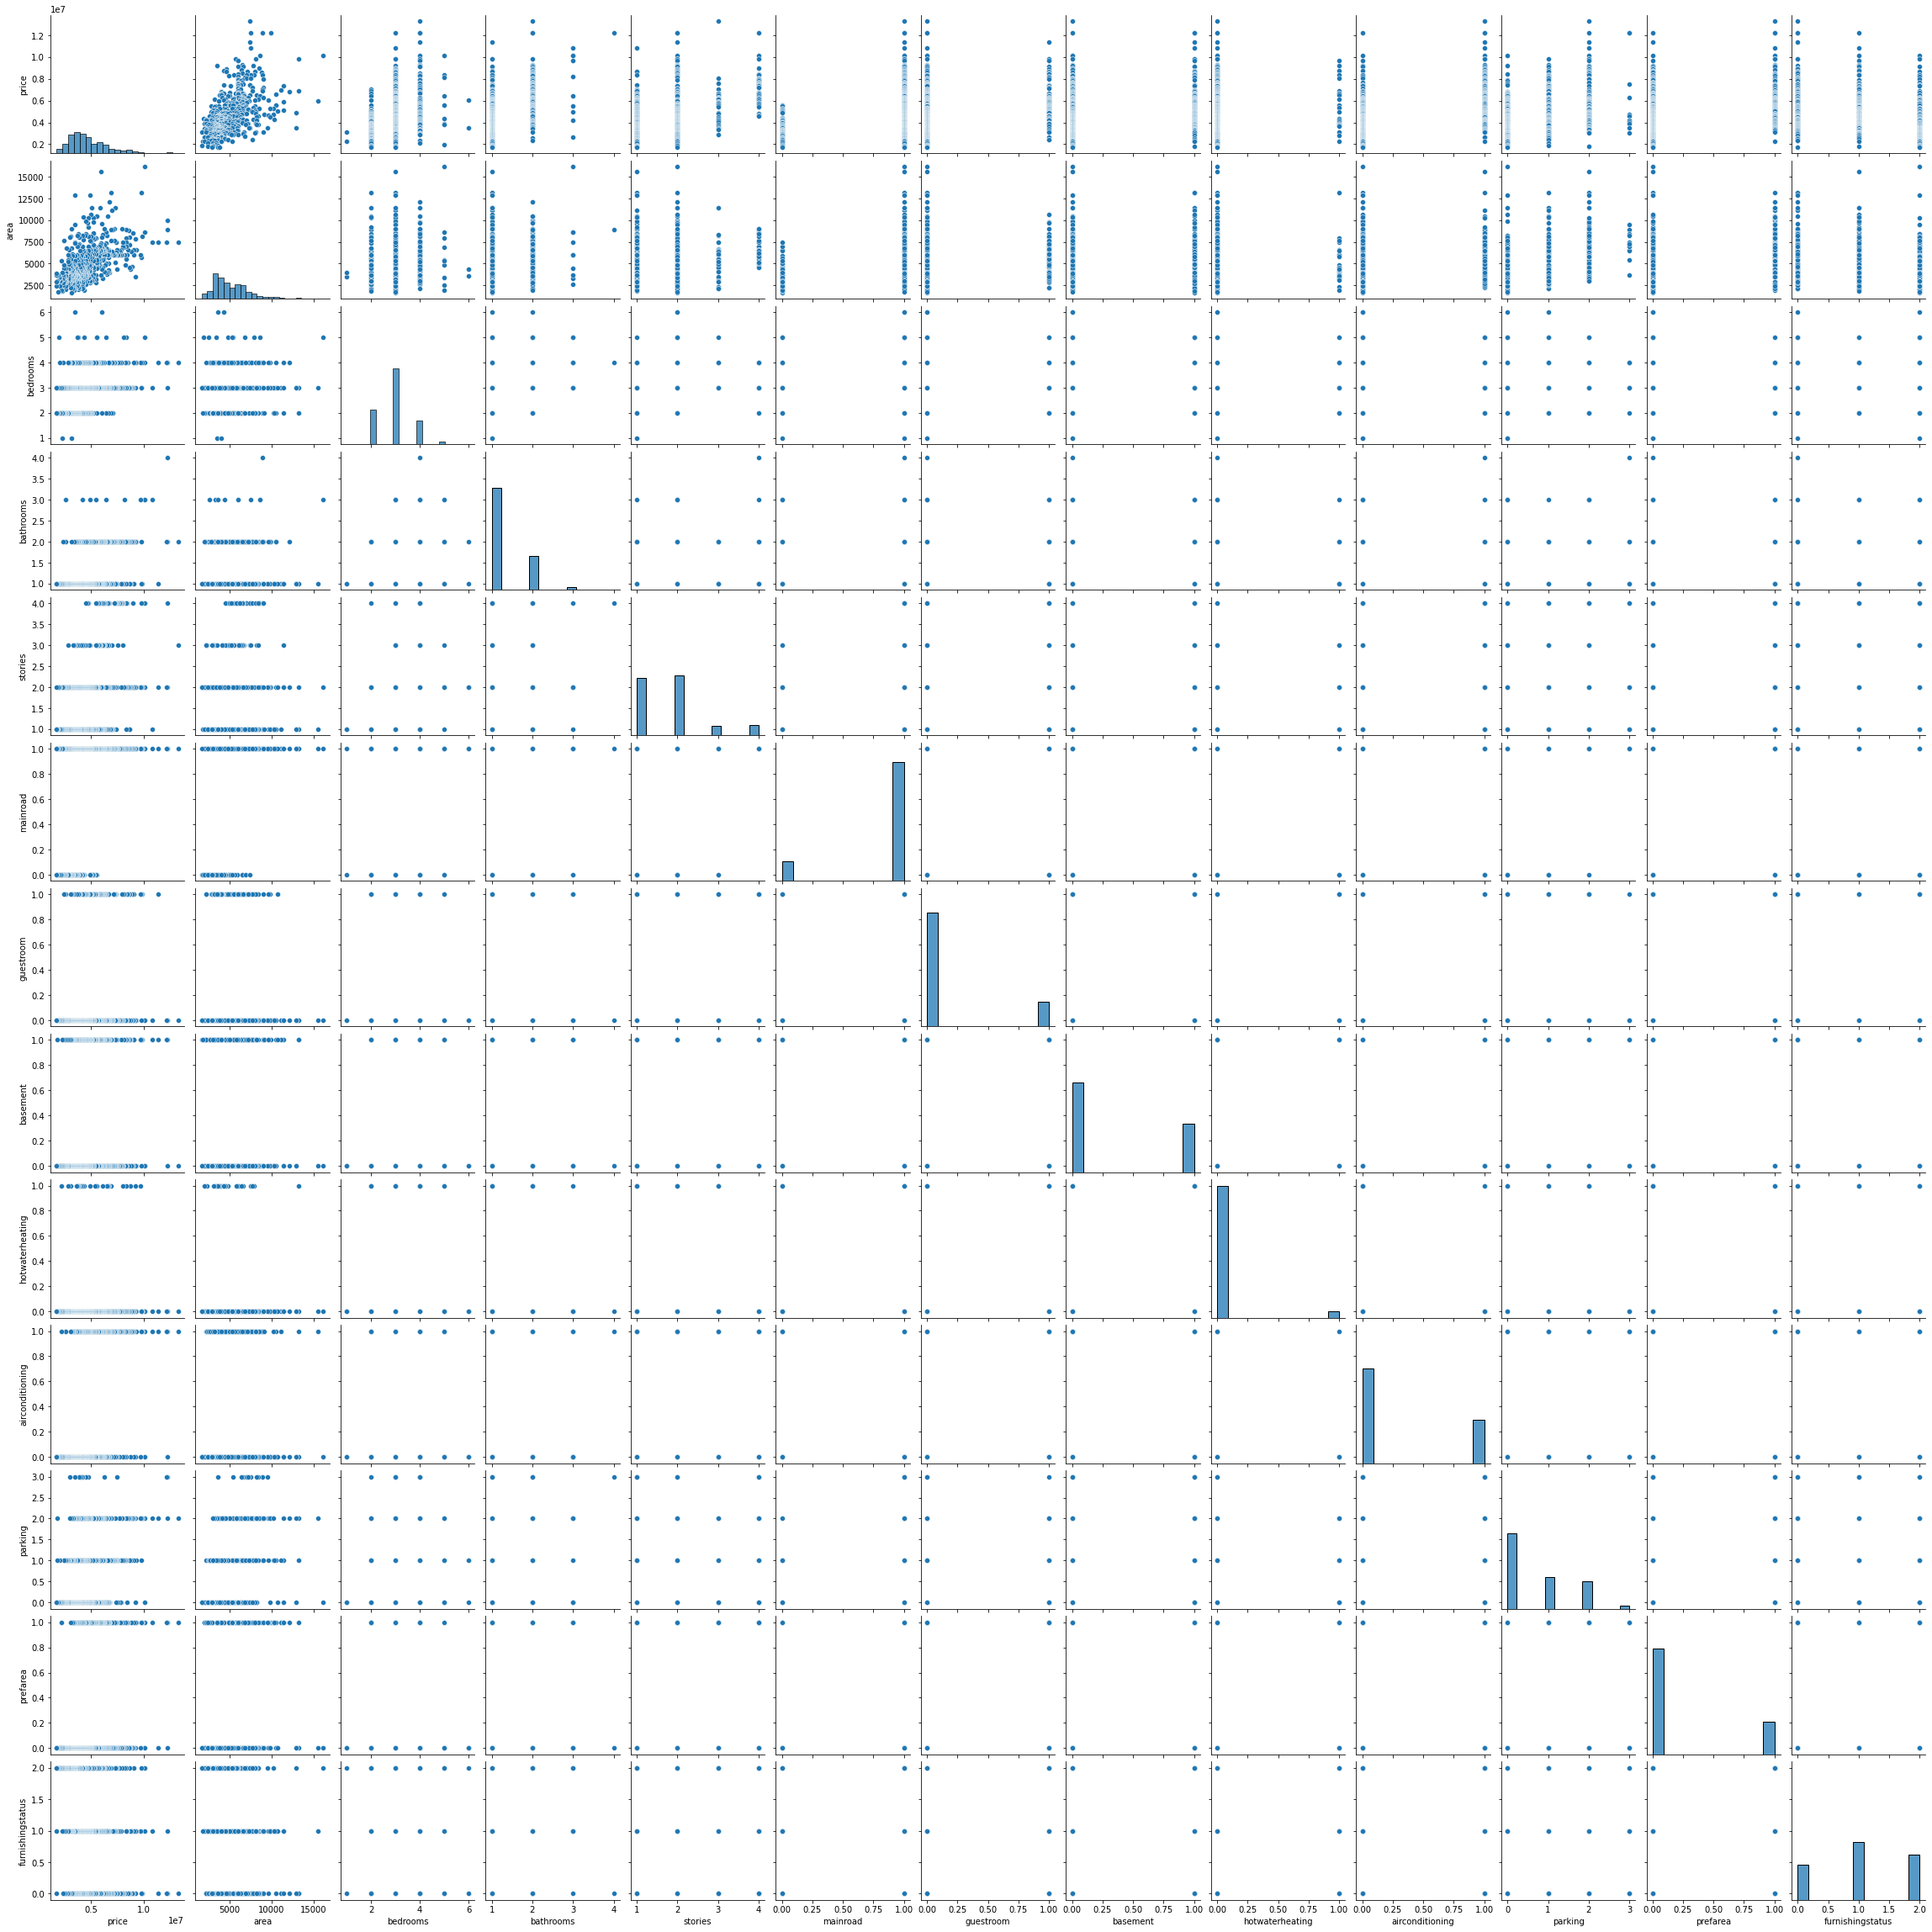

In [ ]:
sns.pairplot(df)

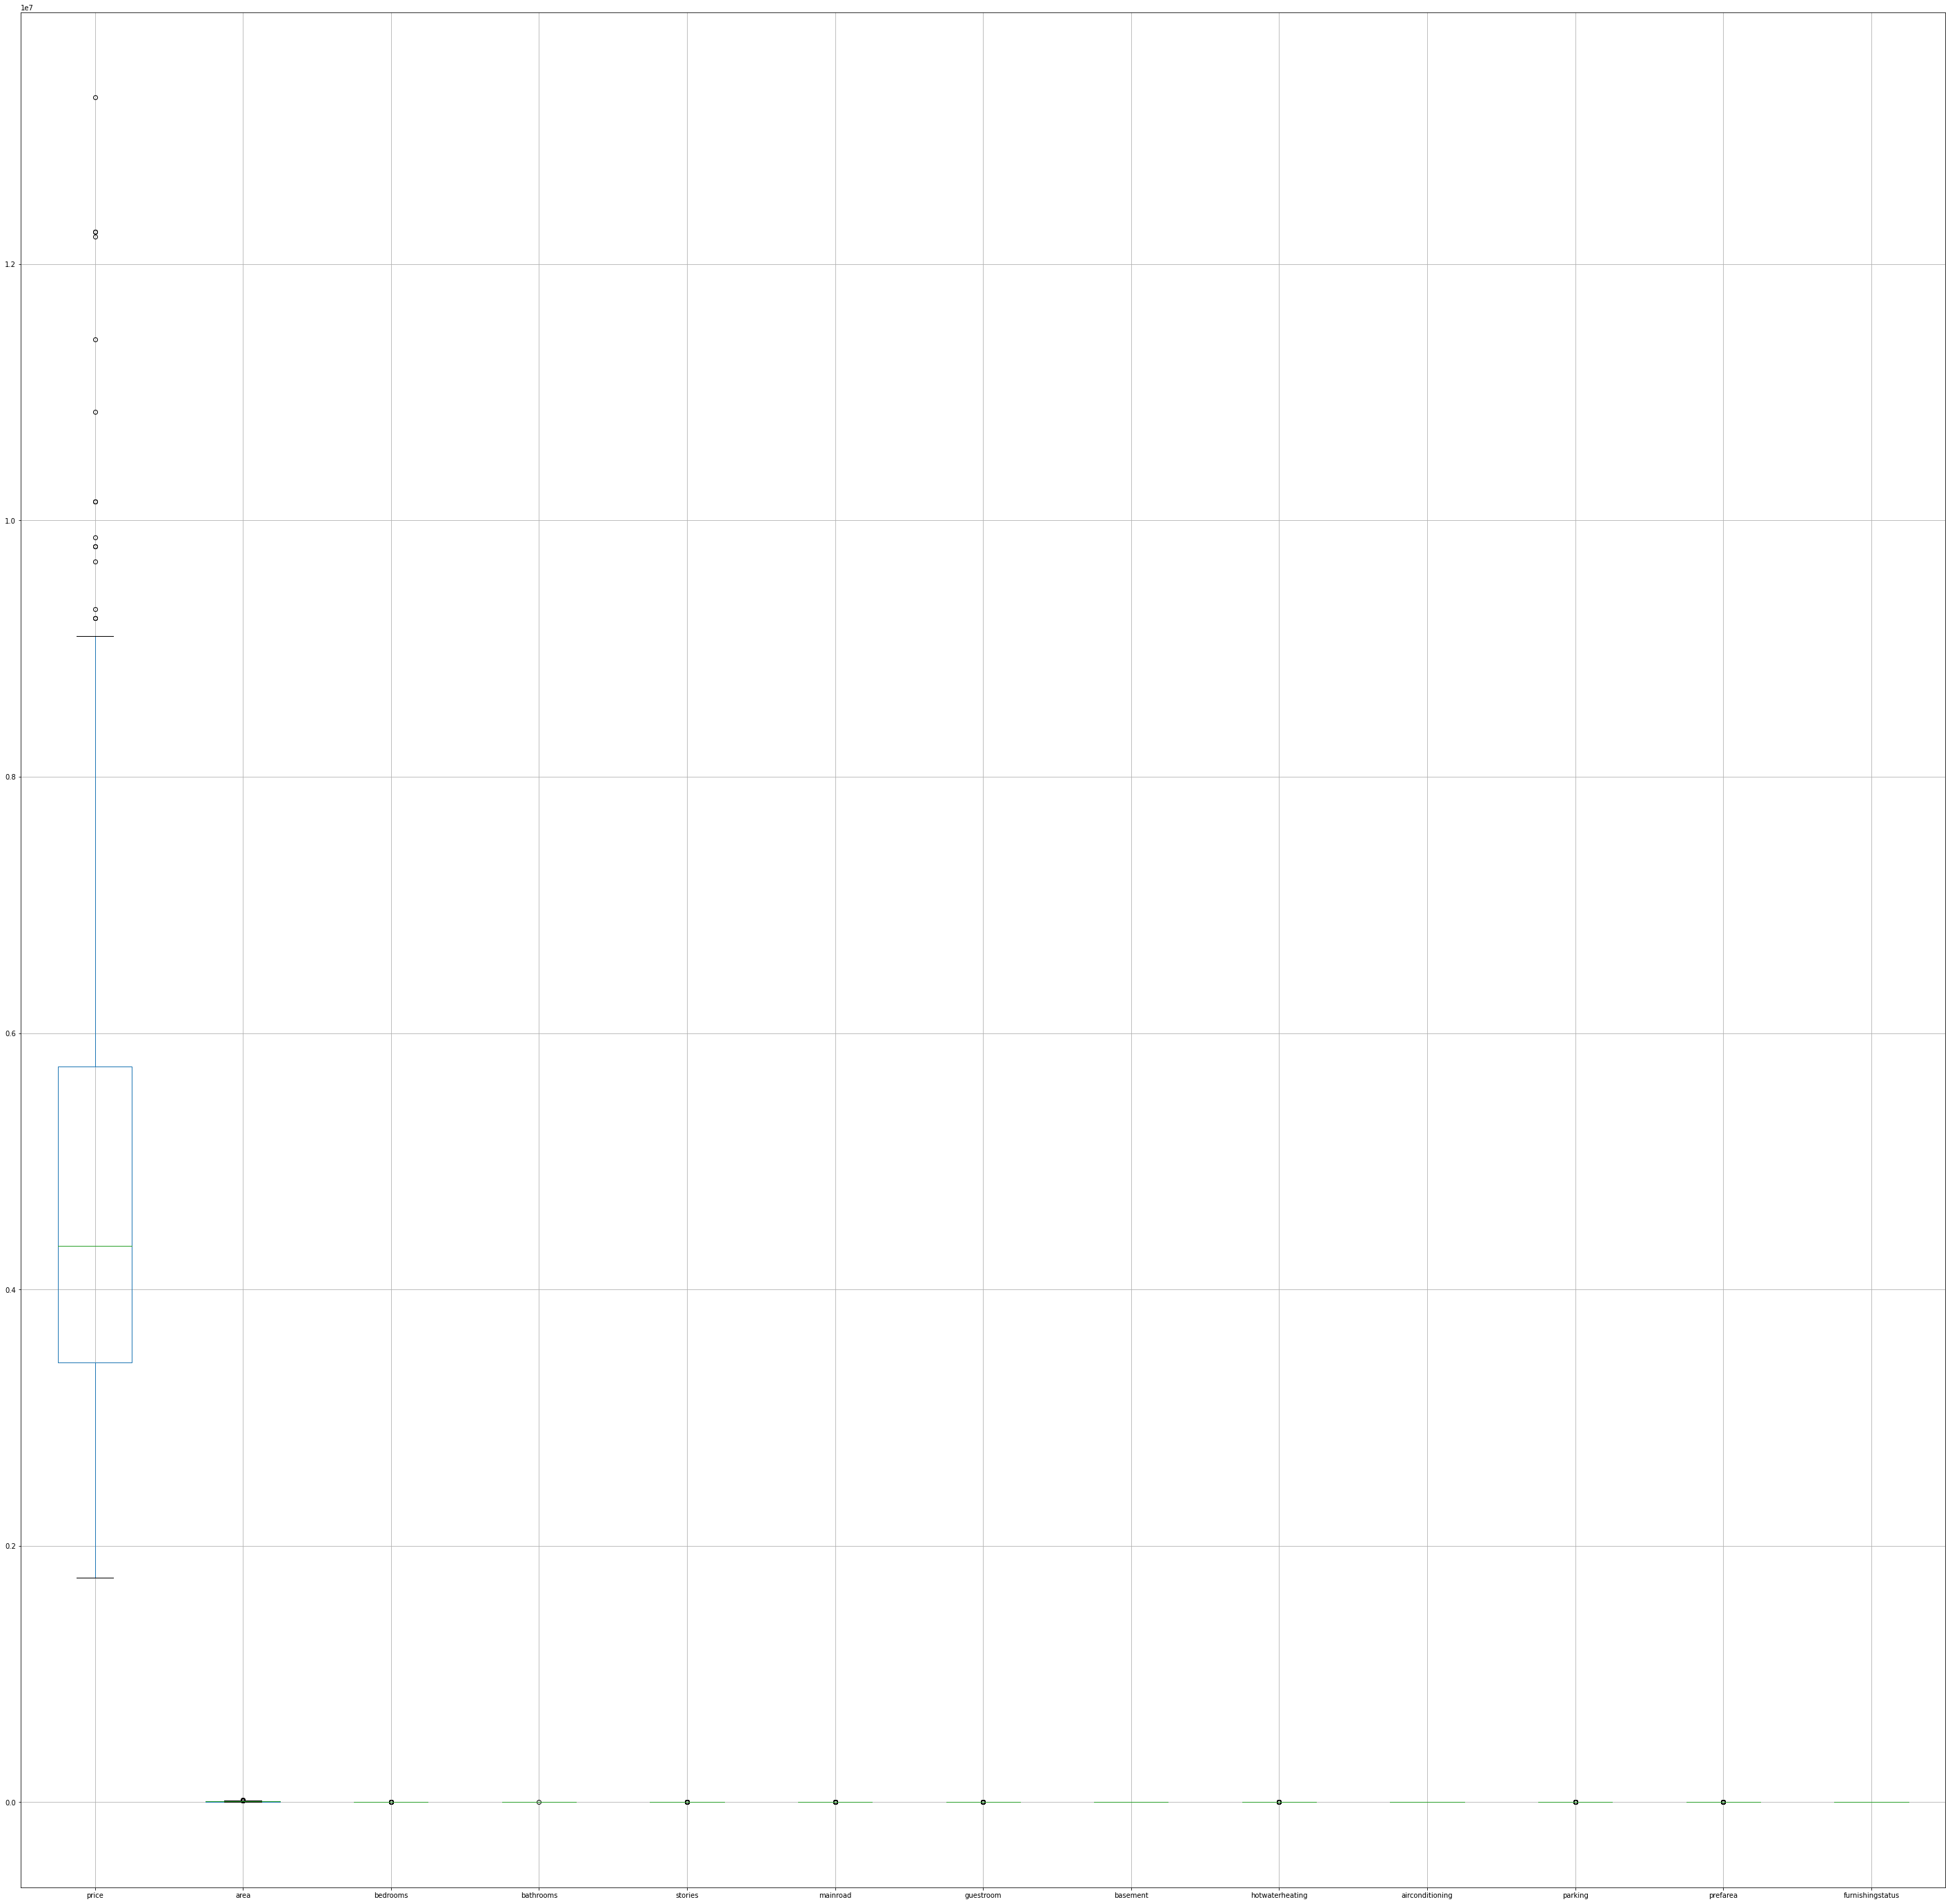

In [ ]:
plt.figure(figsize=(50,50))
df.boxplot()

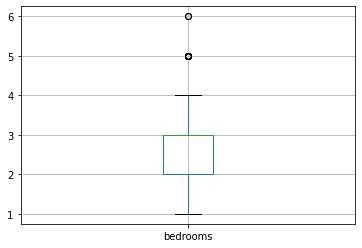

In [ ]:
df[['bedrooms']].boxplot()

In [ ]:
df.bedrooms.value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [ ]:
#how many datapoints are there where bedrooms is more than 4
df.bedrooms[df.bedrooms > 4].count()

12

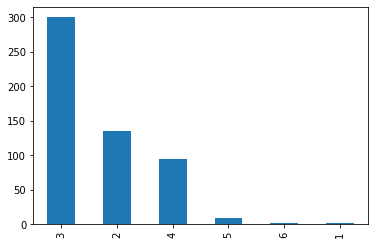

In [ ]:
df.bedrooms.value_counts().plot.bar()

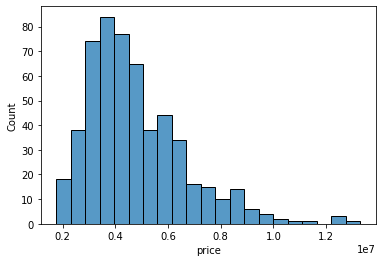

In [ ]:
sns.histplot(df.price)

# Machine learning

   .Defining the model/algorithm

In [ ]:
model = LinearRegression()

# Defining the independent and dependent variable

In [ ]:
df.head(1)

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   

   furnishingstatus  
0                 0

In [ ]:
x=df.drop('price', axis=1)
#x= df.iloc[:,1:]
y= df.price

In [ ]:
x

area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                  0                1        2         1                 0  
1                  0                1        3         0                 0  
2                  0                0        2         1                 1  
3                  0                1        3         1                 0  
4                  0                1        2         0                 0  
..               ...              ...      ...       ...               ...  
540                0                0        2         0                 2  
541                0                0        0         0                 1  
542                0                0        0         0                 2  
543                0                0        0         0                 0  
544                0                0        0         0                 2  

[545 rows x 12 columns]

In [ ]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

#Train test split

In [ ]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
len(x_train)

436

In [ ]:
len(x_test)

109

# Train the road

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 2.43218709e+02,  9.09458957e+04,  9.48647834e+05,  4.76972727e+05,
        3.93067336e+05,  2.59012954e+05,  3.96848350e+05,  6.37281276e+05,
        8.61554265e+05,  2.92488828e+05,  5.67159563e+05, -2.53783987e+05])

In [ ]:
#cost function (intercept value)
model.intercept_

257402.95324978977

In [ ]:
'''formula for regression
y=mx+c  for linear regression
y= c+m1x1 +m2x2+....+m(n)x(n) multiple regression
'''

# .Testing

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([5941805.18737838, 2682871.39253636, 3143298.74040027,
       5285103.98147232, 5734357.7337491 , 4549145.57349868,
       4593508.620836  , 6071427.5327207 , 4294960.75092463,
       6773604.94679029, 3559321.17574975, 3886765.4636808 ,
       6795088.04757136, 5131792.08521762, 3563975.39770662,
       3243018.41090101, 4311613.3062529 , 4041784.65412724,
       4992657.30487976, 5089061.67359079, 4069791.40286807,
       6244545.98191708, 3205264.39987143, 4205824.69278622,
       3988888.54523568, 4501774.30156987, 4932282.73281489,
       2860693.10229264, 5670848.28971949, 5268186.33458707,
       2791486.87667441, 7691808.74494379, 7485518.34451101,
       2612551.71433081, 3230403.44738654, 4996374.50642171,
       3976444.19878463, 3366849.80004168, 5073954.33427924,
       3362730.24716677, 2905703.53359624, 2986802.23717481,
       6607985.45233548, 8337663.82874888, 5228317.1966624 ,
       3157821.78148244, 4604010.56394297, 4274371.74334296,
       3518433.96750209,

In [ ]:
newdf= pd.DataFrame({"Actual value": y_test,
                     "predicted value": y_pred})

In [ ]:
newdf

Actual value  predicted value
383       3570000     5.941805e+06
470       3010000     2.682871e+06
417       3395000     3.143299e+06
75        6650000     5.285104e+06
143       5600000     5.734358e+06
..            ...              ...
192       5040000     5.177193e+06
160       5460000     6.501748e+06
174       5250000     4.758074e+06
469       3010000     3.376789e+06
121       5950000     6.415407e+06

[109 rows x 2 columns]

Text(0.5, 1.0, 'Actual v/s predicted')

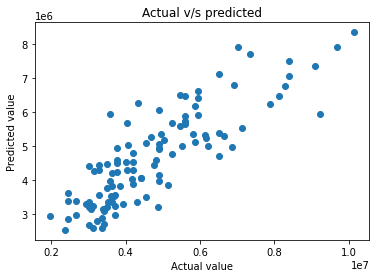

In [ ]:
plt.scatter(newdf['Actual value'],newdf['predicted value'])
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual v/s predicted')

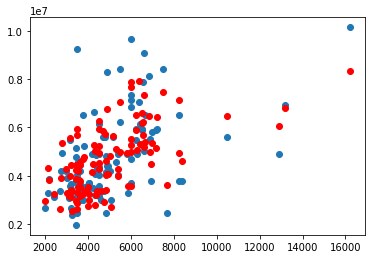

In [ ]:
plt.scatter(x_test.area, y_test)
plt.scatter(x_test.area, y_pred,color='r')


#perfomance


In [ ]:
r2_score(y_test,y_pred)

0.708461565571582

In [ ]:
#accuracy=74%

In [ ]:
model.predict([[2500,2,2,2,2,2,2,1,1,1,1,1]])[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


8101139.862383007

#Exporting the model

In [ ]:
with open ('model.pkl','wb') as files:
  pickle.dump(model,files)